In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TSML

In [2]:
def dertanh(X):
    return 1-np.power(np.tanh(X),2)

def ReLU(X):
    return X*(X>0)

def deReLU(Z):
    return Z>0

In [3]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

In [4]:
def cost(y,p):
    return -1*np.mean(y*np.log(p))

In [5]:
data=np.random.randn(2000,2)
data2=(25./100.)*np.random.randn(1000,2)
data3=2.3*np.random.randn(3000,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle3=np.array([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])

data2=np.hstack((data2,np.zeros((data2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))


data=data[:300,:]
data2=data2[:300,:]
data3=data3[:300,:]
X=np.vstack((data,data2,data3))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [6]:
colors=["red","blue","green"]

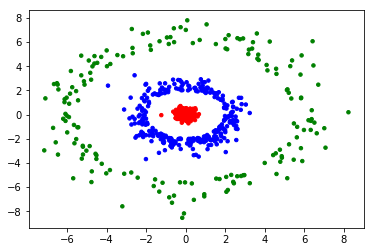

In [7]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[y.reshape(-1).astype(int)], s=12)

In [8]:
nodes=[20]*3+[3]
activs=[np.tanh]*3+[softmax]
deracts=[dertanh]*3

In [9]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True)

In [10]:
for i in range(5):
    model.weightinit()
    model.train(X,y,5000,1e-4,0)

4531
4139
3523
2981


In [17]:
meantanh=np.mean([2856,4078,4509,1914,1904])

In [15]:
nodes=[20]*3+[3]
activs=[ReLU]*3+[softmax]
deracts=[deReLU]*3

In [16]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True)

In [18]:
for i in range(5):
    model.weightinit()
    model.train(X,y,5000,1e-4,0)

744
1156
1053
1041
1074


In [34]:
meanrelu=np.mean([744,1156,1041,1053,1074])

In [20]:
nodes=[20]*3+[3]
activs=[np.tanh]*3+[softmax]
deracts=[dertanh]*3

In [21]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

In [20]:
# for i in range(10):
#     model.weightinit()
#     print(0.01*(i+1))
#     model.train(X,y,5000,5e-5,0.01*(i+1))

In [21]:
# for i in range(10):
#     model.weightinit()
#     print(0.1*(i+1))
#     model.train(X,y,5000,5e-5,0.1*(i+1))

In [14]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True)

In [16]:
for i in range(5):
    model.weightinit()
    model.train(X,y,5000,.6e-4,0.99)

179
261
168
241
167


In [35]:
meannesttanh=np.mean([463,471,657,1177,765])

In [25]:
nodes=[20]*3+[3]
activs=[ReLU]*3+[softmax]
deracts=[deReLU]*3

In [30]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True)

In [11]:
for i in range(5):
    model.weightinit()
    model.train(X,y,5000,1e-4,0.99)

228
162


KeyboardInterrupt: 

In [36]:
meannestrelu=np.mean([503,218,1122,433,211])

In [48]:
print('tanh','     ReLU','   Nesterov tanh','  Nesterov ReLU')
print(str(meantanh)+"  ",str(meanrelu)+"     ",str(meannesttanh)+"          ",str(meannestrelu)+"  ")

tanh      ReLU    Nesterov tanh   Nesterov ReLU
3052.2   1013.6      706.6           497.4  
